In [2]:
from utils import u_time as ut
from utils import u_arrays as ua
from eod import read_eod as re
import salem
import numpy as np
from scipy.ndimage.measurements import label 
import pyproj
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
import cleo
import pickle as pkl
import os
import math


pylab.rcParams['figure.figsize'] = 20., 12.
%matplotlib inline

In [3]:
wv = pkl.load( open ('/users/global/cornkle/MCSfiles/save/MCS_allyears_label.p', 'rb'))

In [4]:
wv.keys()

dict_keys(['t0_min', 'p0_mean', 't3_min', 't2_min', 'tx_min', 'p3_max', 'p2_mean', 'scales1', 'p1_mean', 't3_mean', 'pnb2', 't1_mean', 'torigx', 'pnb0', 'scales3', 'torig1', 'torig0', 'p2_max', 'p0_max', 'scalesx', 'tx_mean', 'p1_max', 't2_mean', 'px_max', 'torig3', 'p3_mean', 'torig2', 'scales2', 'pnb1', 't0_mean', 'scales0', 'pnb3', 'pnbx', 't1_min', 'porig', 'px_mean'])

In [5]:
wv['t0_min'].size

9808

In [6]:
uni=np.unique(wv['scales0'], return_counts=True)

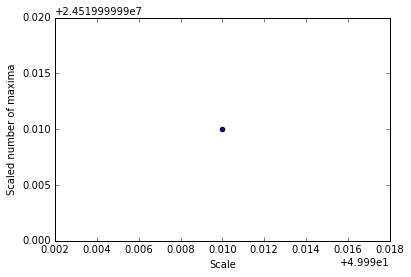

In [7]:
plt.scatter(uni[0], uni[1]*uni[0]**2)
plt.xlabel('Scale')
plt.ylabel('Scaled number of maxima')
#plt.savefig('/users/global/cornkle/figs/lmax/scale_max.jpg')

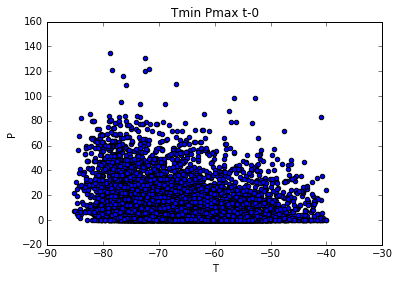

In [31]:
plt.scatter(wv['t3_mean'][wv['t3_mean']<-40], wv['p3_max'][wv['t3_mean']<-40])
plt.xlabel('T')
plt.ylabel('P')
plt.title('Tmin Pmax t-0')
#plt.savefig('/users/global/cornkle/figs/lmax/t_p_noW0.jpg')

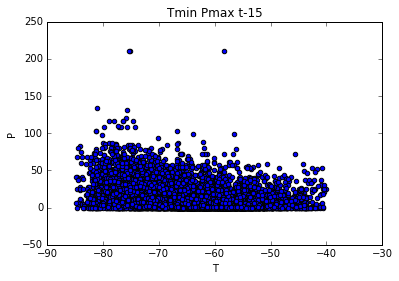

In [25]:
plt.scatter(wv['t2_mean'][wv['t2_mean']<-40], wv['p2_max'][wv['t2_mean']<-40])
plt.xlabel('T')
plt.ylabel('P')
plt.title('Tmin Pmax t-15')
plt.savefig('/users/global/cornkle/figs/lmax/t_p_noW1.jpg')


In [16]:
np.ones((5,5))

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

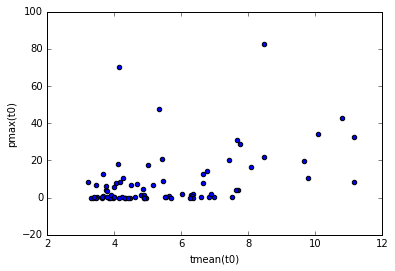

In [347]:
plt.scatter(np.sqrt(wv['tw0_max'])[pos],wv['p0_max'][pos])
plt.xlabel('tmean(t0)')
plt.ylabel('pmax(t0)')
#plt.savefig('/users/global/cornkle/figs/lmax/tmean_pmax_t0.jpg')

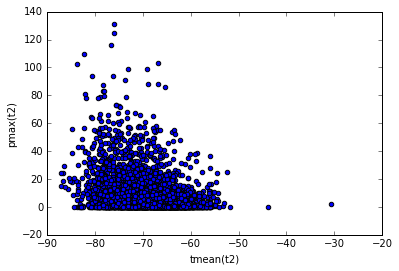

In [277]:
plt.scatter(wv['t2_mean'][wv['t2_mean']<-30],wv['p2_max'][wv['t2_mean']<-30])
plt.xlabel('tmean(t2)')
plt.ylabel('pmax(t2)')
plt.savefig('/users/global/cornkle/figs/lmax/tmean_pmax_t2.jpg')

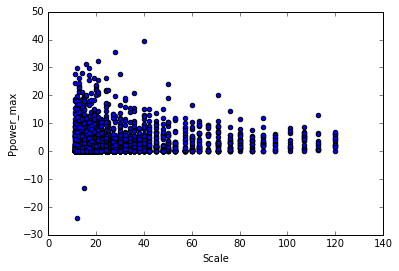

In [278]:
sc=20
pos=np.where((wv['scales0']==sc))
plt.scatter(wv['scales0'],wv['p0_mean'])
plt.xlabel('Scale')
plt.ylabel('Ppower_max')
#plt.savefig('/users/global/cornkle/figs/lmax/pp_scale.jpg')

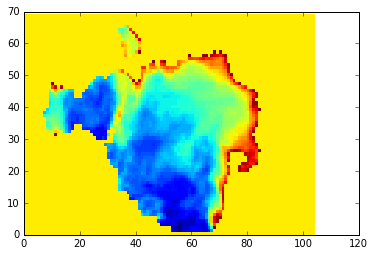

In [264]:
plt.pcolormesh(wv['torigx'][0])

In [ ]:
H1, bins1 = np.histogram(to30, bins=9, range=(tm.min(), tm.max()))
H, bins = np.histogram(tm, bins=9, range=(tm.min(), tm.max()))
#width=np.diff(bins)
#freq=float(H)/float(to30.size)
#plt.bar(bins[:-1], freq, width)
H=H.astype(float)
H1=H1.astype(float)
print H1
print H
hist=H1/H*100.
print hist
width = 0.7 * (bins[1] - bins[0])
print bins[1] - bins[0]
center = (bins[:-1] + bins[1:]) / 2
print center
plt.bar(center, hist, align='center', width=width)
plt.xlabel('Mean T per MCS')
plt.ylabel('MCS max. PCP > 30mm h-1 (%)')